## Definindo a pasta de partida dos comandos

Case de estudo com agradecimentos ao dataset 3w: https://github.com/ricardovvargas/3w_dataset

In [2]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 36.0 MB/s 
     |████████████████████████████████| 9.8 MB 29.4 MB/s 
     |████████████████████████████████| 136 kB 61.5 MB/s 
     |████████████████████████████████| 837 kB 47.9 MB/s 
     |████████████████████████████████| 140 kB 49.5 MB/s 
     |████████████████████████████████| 830 kB 41.8 MB/s 
     |████████████████████████████████| 822 kB 43.7 MB/s 
     |████████████████████████████████| 802 kB 46.7 MB/s 
     |████████████████████████████████| 802 kB 53.1 MB/s 
     |████████████████████████████████| 793 kB 37.5 MB/s 
     |████████████████████████████████| 793 kB 51.2 MB/s 
     |████████████████████████████████| 791 kB 52.4 MB/s 
     |████████████████████████████████| 786 kB 53.0 MB/s 
     |████████████████████████████████| 779 kB 51.2 MB/s 
     |███████████████████████████

In [1]:
import os

os.chdir('/content/drive/MyDrive/Palestras BI/Detecção de Anomalia em Séries Temporais - Preparação de Dataset')

In [2]:
!pwd

/content/drive/MyDrive/Palestras BI/Detecção de Anomalia em Séries Temporais - Preparação de Dataset


Como a base de dados já foi captada, a etapa 1 já está previamente executada

## Etapa 2 - Análise da base de dados

In [3]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Quantidade de arquivos na pasta para processamento
len(glob.glob('./dataset_anomalia_ts/*.csv'))

129

101    148616
0       13779
1       10405
Name: class, dtype: int64


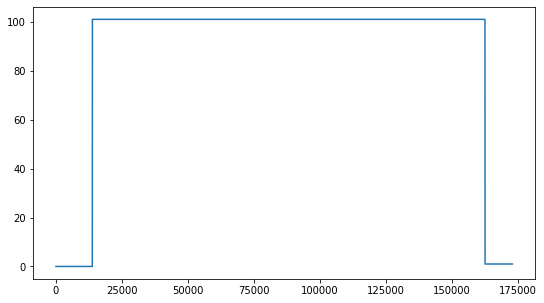

In [5]:
# Comportamento da saida ao longo do tempo total de amostragem
with open('./dataset_anomalia_ts/DRAWN_00001.csv') as filename:
  datadf = pd.read_csv(filename)
  print(datadf['class'].value_counts())
  plt.figure(figsize=(9,5))
  plt.plot(datadf['class'])

In [6]:
# Processar todos os arquivos existentes e guardar o tempo total de cada classe de saida
classes_stats = {}

for filename in glob.glob('./dataset_anomalia_ts/*.csv'):
  datadf = pd.read_csv(filename)
  classes_stats[filename] = datadf['class'].value_counts().to_dict()

classes_stats = pd.DataFrame(classes_stats).T
classes_stats = classes_stats.fillna(0)
classes_stats.head()

,101,0,1
./dataset_anomalia_ts/DRAWN_00005.csv,12959.0,1441.0,0.0
./dataset_anomalia_ts/DRAWN_00008.csv,11529.0,1441.0,1430.0
./dataset_anomalia_ts/DRAWN_00004.csv,28508.0,14692.0,0.0
./dataset_anomalia_ts/DRAWN_00003.csv,19017.0,2161.0,422.0
./dataset_anomalia_ts/DRAWN_00007.csv,41478.0,1722.0,0.0


In [7]:
classes_stats.describe()

,101,0,1
count,129.000000,129.000000,129.000000
mean,40917.015504,6227.279070,22526.930233
std,20934.068265,2981.690104,7470.082663
min,6570.000000,959.000000,0.000000
25%,19017.000000,6000.000000,25199.000000
50%,43200.000000,6000.000000,25199.000000
75%,57600.000000,6000.000000,25199.000000
max,148616.000000,32830.000000,25200.000000


Algumas conclusões sobre as classes:
 - Em média o tempo máximo de amostragem com normalidade (classe 0) é de 6000s
 - Há arquivos somente com periodo de classe transiente (sem anormalidade efetiva)

In [8]:
with open('./dataset_anomalia_ts/DRAWN_00001.csv') as filename:
  datadf = pd.read_csv(filename)
datadf.describe()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
count,172800.000000,172800.000000,172800.000000,172800.000000,172800.000000,0.0,0.0,0.0,172800.000000
mean,423.656283,131.441055,111.943119,59.466362,67.342366,NaN,NaN,NaN,86.924890
std,3.121779,40.445700,20.693902,32.491696,7.138171,NaN,NaN,NaN,34.892163
min,420.218500,59.820050,8.354756,12.892030,31.271210,NaN,NaN,NaN,0.000000
25%,420.813075,94.282980,115.201800,21.481205,67.141390,NaN,NaN,NaN,101.000000
50%,422.782750,145.617000,115.823900,69.864680,68.633680,NaN,NaN,NaN,101.000000
75%,425.832325,167.587575,117.068100,91.641465,69.904880,NaN,NaN,NaN,101.000000
max,429.832900,175.662000,123.600300,96.760930,72.170950,NaN,NaN,NaN,101.000000


In [9]:
with open('./dataset_anomalia_ts/DRAWN_00003.csv') as filename:
  datadf = pd.read_csv(filename)
datadf.describe()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,0.0,0.0,0.0,21600.000000
mean,123.811282,31.937383,47.330625,10.582446,31.865858,NaN,NaN,NaN,88.941620
std,3.339435,7.313488,7.049514,0.342581,0.379513,NaN,NaN,NaN,32.719836
min,120.359900,19.074550,8.375321,10.047560,30.030850,NaN,NaN,NaN,0.000000
25%,120.796900,24.941545,48.994860,10.212390,31.958870,NaN,NaN,NaN,101.000000
50%,122.448950,35.136250,49.053980,10.705660,31.964010,NaN,NaN,NaN,101.000000
75%,126.989200,38.473010,49.263262,10.907460,31.969150,NaN,NaN,NaN,101.000000
max,129.794300,39.236500,49.586120,10.961440,31.974290,NaN,NaN,NaN,101.000000


Algumas conclusões sobre os atritutos:
 - Os arquivos não possuem a mesma quantidade de colunas
 - Há muitos dados faltantes
 - A quantidade de dados é bem grande

## Etapa 3 - Preprocessamento

Vamos trabalhar apenas com 1 desses arquivos e ver os resultados...

No caso, o arquivo `DRAWN_00001.csv`

In [10]:
with open('./dataset_anomalia_ts/DRAWN_00001.csv') as filename:
  datadf = pd.read_csv(filename)

In [11]:
datadf.describe()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
count,172800.000000,172800.000000,172800.000000,172800.000000,172800.000000,0.0,0.0,0.0,172800.000000
mean,423.656283,131.441055,111.943119,59.466362,67.342366,NaN,NaN,NaN,86.924890
std,3.121779,40.445700,20.693902,32.491696,7.138171,NaN,NaN,NaN,34.892163
min,420.218500,59.820050,8.354756,12.892030,31.271210,NaN,NaN,NaN,0.000000
25%,420.813075,94.282980,115.201800,21.481205,67.141390,NaN,NaN,NaN,101.000000
50%,422.782750,145.617000,115.823900,69.864680,68.633680,NaN,NaN,NaN,101.000000
75%,425.832325,167.587575,117.068100,91.641465,69.904880,NaN,NaN,NaN,101.000000
max,429.832900,175.662000,123.600300,96.760930,72.170950,NaN,NaN,NaN,101.000000


### - Retirar colunas sem valores

In [16]:
datadf = datadf.drop(['P-JUS-CKGL', 'T-JUS-CKGL', 'QGL'], axis=1)

In [17]:
datadf.head()

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
0,2018-09-05 20:44:36.000000,420.2314,175.3406,114.8907,96.64524,66.7545,0
1,2018-09-05 20:44:37.000000,420.2314,175.3406,114.8907,96.64524,66.7545,0
2,2018-09-05 20:44:38.000000,420.2314,175.3406,114.8907,96.64524,66.7545,0
3,2018-09-05 20:44:39.000000,420.2314,175.3406,114.8907,96.64524,66.7545,0
4,2018-09-05 20:44:40.000000,420.2314,175.3406,114.8907,96.64524,66.7545,0


### - Checar se há uma quantidade mínima de amostragem da classe desejada

**Não precisamos fazer essa validação mas para processar outros arquivos deveria fazer...**

### - Organizar os dados em blocos com uma taxa amostragem como parâmetro em função

In [18]:
desired_class = 0
# filtrar os registros da classe desejada
filter_class_df = datadf[datadf['class'] == desired_class]
# retirar a coluna de classe
filter_class_df = filter_class_df.drop('class', axis=1)
filter_class_df.head()

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP
0,2018-09-05 20:44:36.000000,420.2314,175.3406,114.8907,96.64524,66.7545
1,2018-09-05 20:44:37.000000,420.2314,175.3406,114.8907,96.64524,66.7545
2,2018-09-05 20:44:38.000000,420.2314,175.3406,114.8907,96.64524,66.7545
3,2018-09-05 20:44:39.000000,420.2314,175.3406,114.8907,96.64524,66.7545
4,2018-09-05 20:44:40.000000,420.2314,175.3406,114.8907,96.64524,66.7545


In [19]:
# criar a nova estrutura dos dados em batch
sample_size=60*2
size_df_classe = len(filter_class_df)
batches_data = pd.DataFrame()
new_sample_id = 0
for i in range(0, size_df_classe, sample_size):
    data = filter_class_df.iloc[i:i+sample_size,:]
    data.insert(loc=0, column='id', value=new_sample_id)
    batches_data = batches_data.append(data)

    new_sample_id +=1
batches_data #.reset_index(drop=True)

,id,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP
0,0,2018-09-05 20:44:36.000000,420.2314,175.3406,114.8907,96.64524,66.75450
1,0,2018-09-05 20:44:37.000000,420.2314,175.3406,114.8907,96.64524,66.75450
2,0,2018-09-05 20:44:38.000000,420.2314,175.3406,114.8907,96.64524,66.75450
3,0,2018-09-05 20:44:39.000000,420.2314,175.3406,114.8907,96.64524,66.75450
4,0,2018-09-05 20:44:40.000000,420.2314,175.3406,114.8907,96.64524,66.75450
...,...,...,...,...,...,...,...
13774,114,2018-09-06 00:34:10.000000,420.2824,174.5373,115.0463,95.95116,66.86504
13775,114,2018-09-06 00:34:11.000000,420.2825,174.5373,115.0463,95.95116,66.86504
13776,114,2018-09-06 00:34:12.000000,420.2826,174.5373,115.0463,95.95116,66.86504
13777,114,2018-09-06 00:34:13.000000,420.2827,174.5373,115.0463,95.95116,66.86504


In [20]:
# Colocando em uma função para permitir diferentes valores de parâmetros
def create_batches(df, desired_class=0, sample_size=60*2):
  filter_class_df = df[df['class'] == desired_class]
  filter_class_df = filter_class_df.drop('class', axis=1)
  size_df_classe = len(filter_class_df)

  batches_data = pd.DataFrame()
  new_sample_id = 0
  for i in range(0, size_df_classe, sample_size):
    data = filter_class_df.iloc[i:i+sample_size,:]
    data.insert(loc=0, column='id', value=new_sample_id)
    batches_data = batches_data.append(data)

    new_sample_id +=1

  batches_data.reset_index(drop=True)

  return batches_data

In [21]:
normal_df_format = create_batches(datadf)

## Etapa 4 - Processamento com a biblioteca - [*tsfresh*](https://tsfresh.readthedocs.io/en/latest/text/data_formats.html)

Agora, com a base organizada no formato exigido pela biblioteca
- Transformar a base de treino em um dataframe com as informações estatísticas dos batches definidos

In [22]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import MinimalFCParameters    # variáveis estatisticas usadas para extrair a cada batch do dataframe no formato novo
from tsfresh.utilities.dataframe_functions import impute      # substituição de valores (-Inf, +Inf, NAN) por valores apropriados -> (mín, máx, median)

In [23]:
statistical_parameters = MinimalFCParameters()
statistical_parameters.pop('sum_values')
statistical_parameters.pop('length')
statistical_parameters

{'median': None, 'mean': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

In [24]:
disable_progressbar = True
X_train = extract_features(normal_df_format,
                          column_id='id',
                          column_sort='timestamp',
                          default_fc_parameters=statistical_parameters,
                          impute_function=impute,
                          n_jobs=0,
                          disable_progressbar=disable_progressbar)

In [25]:
X_train

,P-PDG__median,P-PDG__mean,P-PDG__standard_deviation,P-PDG__variance,P-PDG__root_mean_square,P-PDG__maximum,P-PDG__absolute_maximum,P-PDG__minimum,P-TPT__median,P-TPT__mean,...,P-MON-CKP__absolute_maximum,P-MON-CKP__minimum,T-JUS-CKP__median,T-JUS-CKP__mean,T-JUS-CKP__standard_deviation,T-JUS-CKP__variance,T-JUS-CKP__root_mean_square,T-JUS-CKP__maximum,T-JUS-CKP__absolute_maximum,T-JUS-CKP__minimum
0,420.2314,420.231400,1.136868e-13,1.292470e-26,420.231400,420.2314,420.2314,420.2314,175.34060,175.340600,...,96.64524,96.64524,66.75450,66.75450,0.000000e+00,0.000000e+00,66.75450,66.75450,66.75450,66.75450
1,420.2314,420.231400,1.136868e-13,1.292470e-26,420.231400,420.2314,420.2314,420.2314,175.34060,175.340600,...,96.64524,96.64524,66.75450,66.75450,0.000000e+00,0.000000e+00,66.75450,66.75450,66.75450,66.75450
2,420.2314,420.231400,1.136868e-13,1.292470e-26,420.231400,420.2314,420.2314,420.2314,175.36260,175.370497,...,96.64524,96.64524,66.75450,66.75450,0.000000e+00,0.000000e+00,66.75450,66.75450,66.75450,66.75450
3,420.2314,420.231400,1.136868e-13,1.292470e-26,420.231400,420.2314,420.2314,420.2314,175.49975,175.483367,...,96.64524,96.64524,66.75450,66.75450,0.000000e+00,0.000000e+00,66.75450,66.75450,66.75450,66.75450
4,420.2314,420.230848,9.928043e-04,9.856604e-07,420.230848,420.2314,420.2314,420.2280,175.50130,175.501300,...,96.64524,96.64524,66.75450,66.75450,0.000000e+00,0.000000e+00,66.75450,66.75450,66.75450,66.75450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,420.2699,420.269900,1.705303e-13,2.908057e-26,420.269900,420.2699,420.2699,420.2699,174.64785,174.646581,...,96.06684,96.06684,66.86504,66.86504,1.421085e-14,2.019484e-28,66.86504,66.86504,66.86504,66.86504
111,420.2699,420.269900,1.705303e-13,2.908057e-26,420.269900,420.2699,420.2699,420.2699,174.53730,174.543731,...,96.06684,95.99877,66.86504,66.86504,1.421085e-14,2.019484e-28,66.86504,66.86504,66.86504,66.86504
112,420.2699,420.269900,1.705303e-13,2.908057e-26,420.269900,420.2699,420.2699,420.2699,174.53730,174.537300,...,95.99794,95.95116,66.86504,66.86504,1.421085e-14,2.019484e-28,66.86504,66.86504,66.86504,66.86504
113,420.2699,420.270575,1.132126e-03,1.281708e-06,420.270575,420.2737,420.2737,420.2699,174.53730,174.537300,...,95.95116,95.95116,66.86504,66.86504,1.421085e-14,2.019484e-28,66.86504,66.86504,66.86504,66.86504


In [26]:
# Valores iguais a 1 para dados dentro da normalidade
y_train = np.ones(len(X_train))

In [27]:
y_train.shape

(115,)

O resultado contém:
- uma quantidade de linhas equivalente a quantidade de IDs no dataframe anterior.
- quantidade de atributos é igual a quantidade de atributos do dataframe anteiror (5 no total) vezes a quantidade de variáveis estatisticas (8 no total). 

Formando no total 115 linhas e 40 colunas.


Isso é pouco? é muito?

Não sabemos...mas o que queremos é que seja suficiente!

E só vamos saber treinando o modelo

### Como já temos as variável de treino (X_train, y_train), vamos montar as variáveis de teste (X_test, y_test)

In [32]:
datadf['class'].value_counts()

101    148616
0       13779
1       10405
Name: class, dtype: int64

Para o periodo de completa anormalidade

In [33]:
anormal_df_format = create_batches(datadf, desired_class=1)
anormal_data = extract_features(anormal_df_format,
                                column_id='id',
                                column_sort='timestamp',
                                default_fc_parameters=statistical_parameters,
                                impute_function=impute,
                                n_jobs=0,
                                disable_progressbar=disable_progressbar)
anormal_data

,P-PDG__median,P-PDG__mean,P-PDG__standard_deviation,P-PDG__variance,P-PDG__root_mean_square,P-PDG__maximum,P-PDG__absolute_maximum,P-PDG__minimum,P-TPT__median,P-TPT__mean,...,P-MON-CKP__absolute_maximum,P-MON-CKP__minimum,T-JUS-CKP__median,T-JUS-CKP__mean,T-JUS-CKP__standard_deviation,T-JUS-CKP__variance,T-JUS-CKP__root_mean_square,T-JUS-CKP__maximum,T-JUS-CKP__absolute_maximum,T-JUS-CKP__minimum
0,429.73010,429.730100,1.705303e-13,2.908057e-26,429.730100,429.7301,429.7301,429.7301,60.46272,60.462720,...,13.35476,13.35476,67.837755,67.837755,2.042512e-01,4.171853e-02,67.838062,68.18859,68.18859,67.48692
1,429.73365,429.733847,2.925233e-03,8.556989e-06,429.733847,429.7391,429.7391,429.7301,60.46272,60.462720,...,13.35476,13.35476,67.130185,67.130184,2.042511e-01,4.171852e-02,67.130494,67.48102,67.48102,66.77935
2,429.74290,429.742257,1.092759e-03,1.194122e-06,429.742257,429.7429,429.7429,429.7392,60.46272,60.462720,...,13.35476,13.35476,66.422610,66.422612,2.042508e-01,4.171841e-02,66.422926,66.77345,66.77345,66.07178
3,429.74290,429.744193,1.711468e-03,2.929122e-06,429.744193,429.7482,429.7482,429.7429,60.46272,60.462720,...,13.35476,13.35476,65.715040,65.715041,2.042512e-01,4.171855e-02,65.715359,66.06588,66.06588,65.36420
4,429.75375,429.753203,2.517172e-03,6.336156e-06,429.753203,429.7558,429.7558,429.7483,60.46272,60.462720,...,13.35476,13.35476,65.007470,65.007470,2.042512e-01,4.171856e-02,65.007791,65.35831,65.35831,64.65663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,429.83290,429.832900,1.136868e-13,1.292470e-26,429.832900,429.8329,429.8329,429.8329,59.98072,59.980720,...,12.89203,12.89203,31.271210,31.271210,0.000000e+00,0.000000e+00,31.271210,31.27121,31.27121,31.27121
83,429.83290,429.832900,1.136868e-13,1.292470e-26,429.832900,429.8329,429.8329,429.8329,59.98072,59.980720,...,12.89203,12.89203,31.271210,31.271210,0.000000e+00,0.000000e+00,31.271210,31.27121,31.27121,31.27121
84,429.83290,429.832900,1.136868e-13,1.292470e-26,429.832900,429.8329,429.8329,429.8329,59.98072,59.980720,...,12.89203,12.89203,31.271210,31.271210,0.000000e+00,0.000000e+00,31.271210,31.27121,31.27121,31.27121
85,429.83290,429.832900,1.136868e-13,1.292470e-26,429.832900,429.8329,429.8329,429.8329,59.98072,59.995674,...,12.89203,12.89203,31.271210,31.271210,0.000000e+00,0.000000e+00,31.271210,31.27121,31.27121,31.27121


Para o periodo transiente, ou seja, passagem de normalidade para anormalidade

In [34]:
transiente_df_format = create_batches(datadf, desired_class=101)
transiente_data = extract_features(transiente_df_format,
                                        column_id='id',
                                        column_sort='timestamp',
                                        default_fc_parameters=statistical_parameters,
                                        impute_function=impute,
                                        n_jobs=0,
                                        disable_progressbar=disable_progressbar)
transiente_data

,P-PDG__median,P-PDG__mean,P-PDG__standard_deviation,P-PDG__variance,P-PDG__root_mean_square,P-PDG__maximum,P-PDG__absolute_maximum,P-PDG__minimum,P-TPT__median,P-TPT__mean,...,P-MON-CKP__absolute_maximum,P-MON-CKP__minimum,T-JUS-CKP__median,T-JUS-CKP__mean,T-JUS-CKP__standard_deviation,T-JUS-CKP__variance,T-JUS-CKP__root_mean_square,T-JUS-CKP__maximum,T-JUS-CKP__absolute_maximum,T-JUS-CKP__minimum
0,420.28280,420.282800,0.000000e+00,0.000000e+00,420.282800,420.2828,420.2828,420.2828,174.53730,174.53730,...,95.95116,95.95116,66.865040,66.865040,1.421085e-14,2.019484e-28,66.865040,66.86504,66.86504,66.86504
1,420.28280,420.282800,0.000000e+00,0.000000e+00,420.282800,420.2828,420.2828,420.2828,174.53730,174.53730,...,95.95116,95.95116,66.865040,66.865040,1.421085e-14,2.019484e-28,66.865040,66.86504,66.86504,66.86504
2,420.28280,420.282800,0.000000e+00,0.000000e+00,420.282800,420.2828,420.2828,420.2828,174.53730,174.53730,...,95.95116,95.95116,66.865040,66.865040,1.421085e-14,2.019484e-28,66.865040,66.86504,66.86504,66.86504
3,420.28280,420.282800,0.000000e+00,0.000000e+00,420.282800,420.2828,420.2828,420.2828,174.53730,174.53730,...,95.95116,95.95116,66.865040,66.865040,1.421085e-14,2.019484e-28,66.865040,66.86504,66.86504,66.86504
4,420.28280,420.282800,0.000000e+00,0.000000e+00,420.282800,420.2828,420.2828,420.2828,174.53730,174.53730,...,95.95116,95.95116,66.865040,66.865040,1.421085e-14,2.019484e-28,66.865040,66.86504,66.86504,66.86504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,429.69945,429.699415,3.157548e-03,9.970108e-06,429.699415,429.7044,429.7044,429.6940,60.46272,60.46272,...,13.35476,13.35476,70.998230,70.998229,2.042513e-01,4.171857e-02,70.998523,71.34907,71.34907,70.64739
1235,429.70440,429.704400,1.705303e-13,2.908057e-26,429.704400,429.7044,429.7044,429.7044,60.46272,60.46272,...,13.35476,13.35476,70.290660,70.290658,2.042512e-01,4.171856e-02,70.290955,70.64150,70.64150,69.93982
1236,429.70855,429.708598,3.029122e-03,9.175577e-06,429.708598,429.7139,429.7139,429.7044,60.46272,60.46272,...,13.35476,13.35476,69.583090,69.583090,2.042488e-01,4.171756e-02,69.583390,69.93392,69.93392,69.23226
1237,429.71945,429.719461,3.170628e-03,1.005288e-05,429.719461,429.7249,429.7249,429.7140,60.46272,60.46272,...,13.35476,13.35476,68.875525,68.875525,2.042507e-01,4.171835e-02,68.875828,69.22636,69.22636,68.52469


Como são muitos registro de transiente, vamos sortear para manter as bases razoavelmente equilibradas

In [35]:
small_transiente_data = transiente_data.sample(100)
small_transiente_data.shape

(100, 40)

In [36]:
X_test = anormal_data.append(small_transiente_data, ignore_index=True)
X_test

,P-PDG__median,P-PDG__mean,P-PDG__standard_deviation,P-PDG__variance,P-PDG__root_mean_square,P-PDG__maximum,P-PDG__absolute_maximum,P-PDG__minimum,P-TPT__median,P-TPT__mean,...,P-MON-CKP__absolute_maximum,P-MON-CKP__minimum,T-JUS-CKP__median,T-JUS-CKP__mean,T-JUS-CKP__standard_deviation,T-JUS-CKP__variance,T-JUS-CKP__root_mean_square,T-JUS-CKP__maximum,T-JUS-CKP__absolute_maximum,T-JUS-CKP__minimum
0,429.73010,429.730100,1.705303e-13,2.908057e-26,429.730100,429.7301,429.7301,429.7301,60.46272,60.462720,...,13.35476,13.35476,67.837755,67.837755,2.042512e-01,4.171853e-02,67.838062,68.18859,68.18859,67.48692
1,429.73365,429.733847,2.925233e-03,8.556989e-06,429.733847,429.7391,429.7391,429.7301,60.46272,60.462720,...,13.35476,13.35476,67.130185,67.130184,2.042511e-01,4.171852e-02,67.130494,67.48102,67.48102,66.77935
2,429.74290,429.742257,1.092759e-03,1.194122e-06,429.742257,429.7429,429.7429,429.7392,60.46272,60.462720,...,13.35476,13.35476,66.422610,66.422612,2.042508e-01,4.171841e-02,66.422926,66.77345,66.77345,66.07178
3,429.74290,429.744193,1.711468e-03,2.929122e-06,429.744193,429.7482,429.7482,429.7429,60.46272,60.462720,...,13.35476,13.35476,65.715040,65.715041,2.042512e-01,4.171855e-02,65.715359,66.06588,66.06588,65.36420
4,429.75375,429.753203,2.517172e-03,6.336156e-06,429.753203,429.7558,429.7558,429.7483,60.46272,60.462720,...,13.35476,13.35476,65.007470,65.007470,2.042512e-01,4.171856e-02,65.007791,65.35831,65.35831,64.65663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,420.88015,420.880181,3.178687e-03,1.010405e-05,420.880181,420.8856,420.8856,420.8747,166.98590,166.985900,...,91.09254,91.09254,67.694090,67.694090,1.421085e-14,2.019484e-28,67.694090,67.69409,67.69409,67.69409
183,423.04905,423.049017,3.157777e-03,9.971556e-06,423.049017,423.0544,423.0544,423.0436,142.24290,142.247222,...,64.85728,64.75937,69.032315,69.033799,1.168559e-02,1.365529e-04,69.033800,69.05570,69.05570,69.02057
184,423.00770,423.008745,1.501269e-03,2.253808e-06,423.008745,423.0125,423.0125,423.0077,142.73375,142.733733,...,65.58230,65.44179,69.020570,69.020570,0.000000e+00,0.000000e+00,69.020570,69.02057,69.02057,69.02057
185,425.60925,425.609274,3.169345e-03,1.004475e-05,425.609274,425.6147,425.6147,425.6041,98.79810,98.798161,...,23.42163,23.41902,70.402310,70.402288,1.427077e-04,2.036549e-08,70.402288,70.40231,70.40231,70.40106


In [37]:
# Valores iguais a -1 para dados fora da normalidade - anormalidade
y_test = -1*np.ones(len(X_test))
y_test.shape

(187,)

- Vamos sortear alguns da base de treino (normalidade) para incorporar no teste

In [38]:
y_test.shape

(187,)

In [39]:
x_train_sample = X_train.sample(frac=0.5)

In [40]:
X_test = X_test.append(x_train_sample)
y_test = np.append(y_test, np.ones(len(x_train_sample)))

X_test.shape, y_test.shape

((245, 40), (245,))

### Apesar de já termos as bases de treino e teste (X e y) para cada, vamos montar uma base exclusiva de validação do modelo (X_val, y_val)

In [43]:
print(len(X_train))  # normalidade
print(len(anormal_data))
print(len(transiente_data))

115
87
1239


Como são muitos registro de transiente, vamos sortear para manter as bases razoavelmente equilibradas

In [57]:
val_set_small_anormal_data = anormal_data.sample(50)
val_set_small_anormal_data.shape

(50, 40)

In [58]:
val_set_small_transiente_data = transiente_data.sample(250)
val_set_small_transiente_data.shape

(250, 40)

In [59]:
X_val = val_set_small_anormal_data.append(val_set_small_transiente_data, ignore_index=True)
X_val

,P-PDG__median,P-PDG__mean,P-PDG__standard_deviation,P-PDG__variance,P-PDG__root_mean_square,P-PDG__maximum,P-PDG__absolute_maximum,P-PDG__minimum,P-TPT__median,P-TPT__mean,...,P-MON-CKP__absolute_maximum,P-MON-CKP__minimum,T-JUS-CKP__median,T-JUS-CKP__mean,T-JUS-CKP__standard_deviation,T-JUS-CKP__variance,T-JUS-CKP__root_mean_square,T-JUS-CKP__maximum,T-JUS-CKP__absolute_maximum,T-JUS-CKP__minimum
0,429.7943,429.794300,1.136868e-13,1.292470e-26,429.794300,429.7943,429.7943,429.7943,60.62339,60.623390,...,13.23907,13.23907,52.978780,52.978781,2.042513e-01,4.171857e-02,52.979174,53.32962,53.32962,52.62794
1,429.8201,429.820100,5.684342e-14,3.231174e-27,429.820100,429.8201,429.8201,429.8201,60.30206,60.302030,...,13.00771,13.00771,44.487940,44.487937,2.042511e-01,4.171853e-02,44.488406,44.83877,44.83877,44.13710
2,429.7943,429.794300,1.136868e-13,1.292470e-26,429.794300,429.7943,429.7943,429.7943,60.62339,60.623390,...,13.23907,13.23907,54.393920,54.393923,2.042511e-01,4.171853e-02,54.394306,54.74476,54.74476,54.04309
3,429.8329,429.832900,1.136868e-13,1.292470e-26,429.832900,429.8329,429.8329,429.8329,59.98072,59.980720,...,12.94336,12.89203,36.704665,36.704664,2.042512e-01,4.171854e-02,36.705233,37.05550,37.05550,36.35383
4,429.8329,429.832900,1.136868e-13,1.292470e-26,429.832900,429.8329,429.8329,429.8329,59.98072,59.980720,...,13.00771,13.00771,32.166185,32.166182,1.361682e-02,1.854177e-04,32.166185,32.18957,32.18957,32.14279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,428.2754,428.275438,6.327323e-03,4.003501e-05,428.275438,428.2863,428.2863,428.2647,69.07233,69.072328,...,15.55378,15.55270,71.585855,71.585858,1.360772e-02,1.851700e-04,71.585860,71.60924,71.60924,71.56298
296,428.8445,428.844505,6.331099e-03,4.008281e-05,428.844505,428.8554,428.8554,428.8336,64.39063,64.390628,...,14.14953,14.05163,72.005140,72.005140,0.000000e+00,0.000000e+00,72.005140,72.00514,72.00514,72.00514
297,426.9328,426.933249,5.751652e-03,3.308150e-05,426.933249,426.9437,426.9437,426.9250,80.06427,80.123546,...,17.98201,17.91137,71.120820,71.120820,0.000000e+00,0.000000e+00,71.120820,71.12082,71.12082,71.12082
298,420.5398,420.539800,1.136868e-13,1.292470e-26,420.539800,420.5398,420.5398,420.5398,170.84190,170.841900,...,93.75321,93.75321,67.141390,67.141390,0.000000e+00,0.000000e+00,67.141390,67.14139,67.14139,67.14139


In [60]:
# Valores iguais a -1 para dados fora da normalidade - anormalidade
y_val = -1*np.ones(len(X_val))
y_test.shape

(245,)

- Vamos sortear alguns da base de treino (normalidade) para incorporar no teste

In [61]:
val_set_normal_data = X_train.sample(80)
val_set_normal_data.shape

(80, 40)

In [62]:
X_val = X_val.append(val_set_normal_data)
y_val = np.append(y_val, np.ones(len(val_set_normal_data)))

X_val.shape, y_val.shape

((380, 40), (380,))

##            
***                                                                             


## Visualizando as bases:

In [69]:
X_train.shape, y_train.shape

((115, 40), (115,))

In [70]:
X_test.shape, y_test.shape

((245, 40), (245,))

In [71]:
X_val.shape, y_val.shape

((380, 40), (380,))

Salvar dados

In [73]:
import pickle

In [72]:
all_data = {}
all_data['X_train'] = X_train
all_data['y_train'] = y_train
all_data['X_test'] = X_test
all_data['y_test'] = y_test
all_data['X_val'] = X_val
all_data['y_val'] = y_val

In [74]:
with open('anomaly_ts_data.pickle', 'wb') as file:
  pickle.dump(all_data, file)